In [2]:
import os
os.getcwd()

'C:\\Users\\Mohan\\Desktop\\Remote Internship-2020\\Python codes'

In [3]:
os.chdir("C:/Users/Mohan/Desktop/Remote Internship-2020/Data Sets")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
data1 = pd.read_csv('Position_Salaries.csv')
data1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
#Feature Engineering
X = data1.iloc[:, 1:2].values
y = data1.iloc[:, 2].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#random_state=0 means this is the seed for the random number generator.
#If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

In [11]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

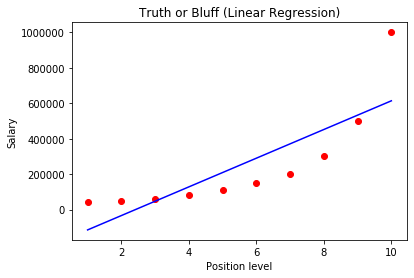

In [12]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [13]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

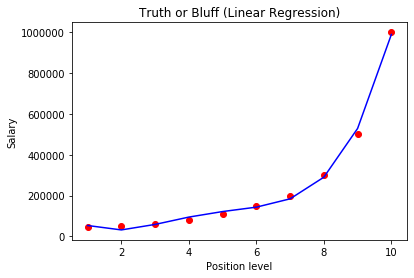

In [14]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

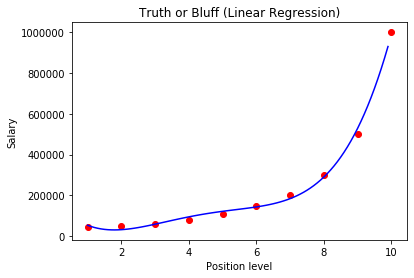

In [17]:
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) 
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()


In [15]:
#Predict the salary of the candidate with 5.5 years of experience using Linear Regression and Polynomial Regression
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])


array([249500.])

In [16]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750003])

# Observation
1. The predicted salary using Linear Regression is $249,500.It’s unacceptable (but still in the range of -10,000 to 300,000 according to Linear Regression)
2. The predicted salary using Polynomial Regression is $132,148.43750 which is very close to our Mean value which is $130,000.